In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
df_X=pd.DataFrame(X)
y_vals=np.array(y)
Xtrain = X[:9900]
Xtest = X[9900:]
ytrain = y[:9900]
ytest = y[9900:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Automatically created module for IPython interactive environment


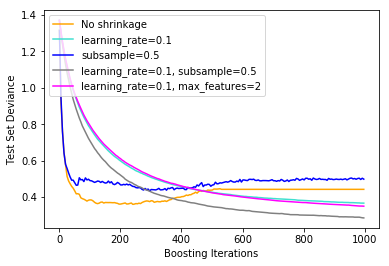

In [6]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf2 = ensemble.RandomForestClassifier()
    #clf2.fit(X_train,y_train)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

In [13]:
len(y_test)

10000

In [21]:
y_pred=clf.predict_proba(X_test)[:,1]

In [14]:
len(y_pred)

10000

In [30]:
y

array([1, 1, 0, ..., 0, 1, 1])

In [36]:
from sklearn import metrics
clf = ensemble.GradientBoostingClassifier()
clf = ensemble.RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.89700498250171889

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


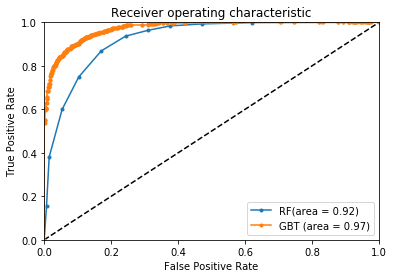

In [54]:
from sklearn.metrics import roc_curve, auc
# Scale columns for regression.
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
 
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,ensemble.RandomForestClassifier)   
#generate_ROCplot(fpr,tpr,'LR',roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.plot(fpr, tpr, '.-',label='RF(area = %0.2f)' % roc_auc)

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,ensemble.GradientBoostingClassifier)   
#generate_ROCplot(fpr,tpr,'LR',roc_auc)
plt.plot(fpr, tpr, '.-',label='GBT (area = %0.2f)' % roc_auc)
plt.legend()

In [49]:
%matplotlib inline

In [32]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])



0.9843601562436245

In [26]:
tpr

array([ nan,  nan,  nan])

In [8]:
dir(clf2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_i

In [9]:
clf2.fit(X_train,y_train)
clf2.score(y_test, y_pred)

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 10000 

In [3]:

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ModuleNotFoundError: No module named 'xgboost'

In [3]:
dir(clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'fit_transform',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'transform',
 'verbose',
 'warm_start']

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

In [10]:
from sklearn import metrics
import pandas as pd
%matplotlib inline

df_X=pd.DataFrame(X)
df_X['score']=clf.predict_proba(df_X)[:,1]
df_X['outcome']=y_vals


In [6]:
def p(beta,x):
    return 1/(1 + np.exp(-np.dot(beta,x)))

def log_like(X,y,beta):
    vals = [y[i]*np.log(p(beta,X[i])) + (1-y[i])*np.log(1-p(beta,X[i])) for i in range(len(X))]
    return np.sum(vals)

In [7]:
log_like(X,y,clf.coef_)

-3885.0144621988256

In [97]:
log_like(X,y,clf.coef_-0.1)

-3756.8278047138433

In [38]:
logs = []
coefs=[]
for i in range(1,20):
    coef = clf.coef_[0]*np.sin(i/7)
    coefs.append(i)
    logs.append(log_like(X,y,coef))
    

In [9]:
import matplotlib.pyplot as plt
plt.plot(coefs,logs)

NameError: name 'coefs' is not defined

In [21]:
clf.coef_[0]

array([ 0.15126347,  0.3734576 , -0.0322838 , -0.21999793, -0.03405179,
       -0.22360951,  0.00567198, -1.31276682,  0.03643517,  0.2148952 ])

In [ ]:
plt.plot(coefs,logs)

In [87]:
clf.coef_

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

0.0


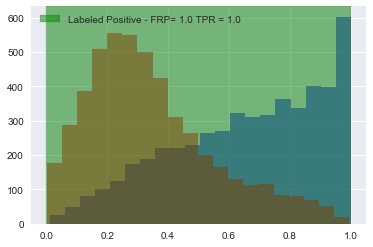

0.1


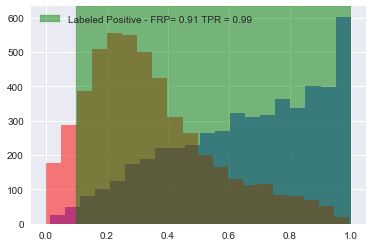

0.2


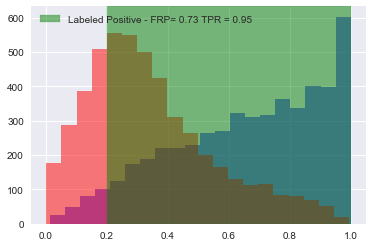

0.3


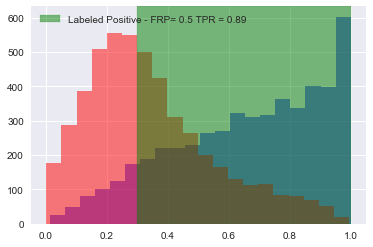

0.4


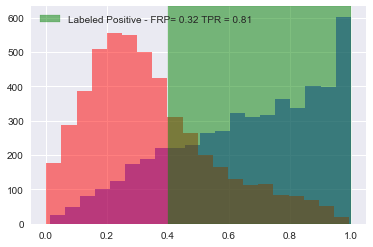

0.5


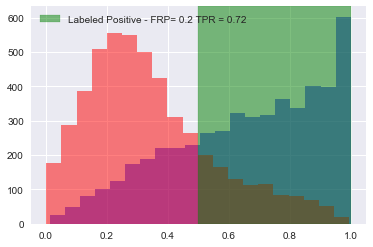

0.6


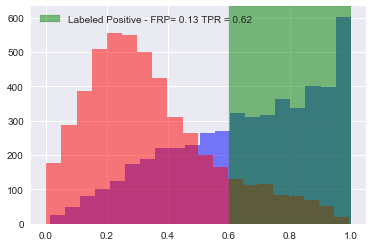

0.7


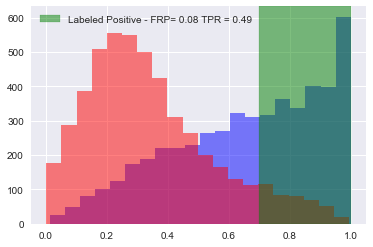

0.8


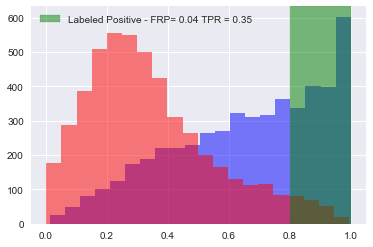

0.9


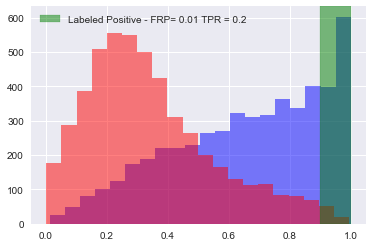

1.0


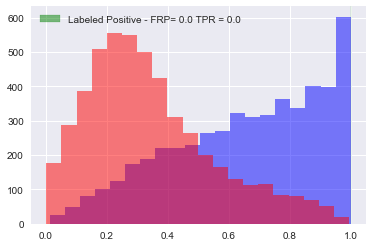

In [72]:
import seaborn
import matplotlib.pyplot as plt
fprs=[]
tprs=[]
for i in range(0,11):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    fpr = np.round(len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==0]),2)
    tpr = np.round(len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==1]),2)
    fprs.append(fpr)
    tprs.append(tpr)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - FRP= ' + str(fpr)+' TPR = ' + str(tpr))
    plt.legend()
    plt.savefig("../img/roc_" + str(i) + ".png")
    plt.show()



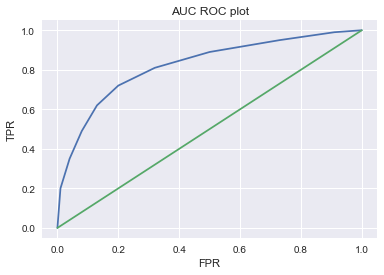

In [75]:
plt.title('AUC ROC plot')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.plot(fprs,tprs)
plt.plot(fprs,fprs)
plt.savefig('../img/roc_final.png')

0.0


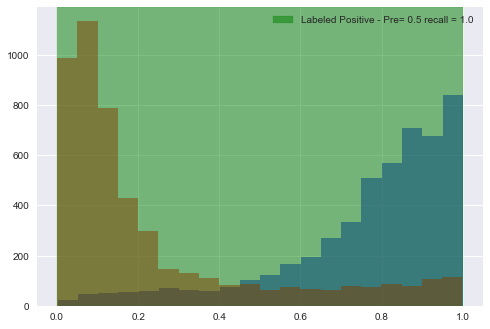

0.1


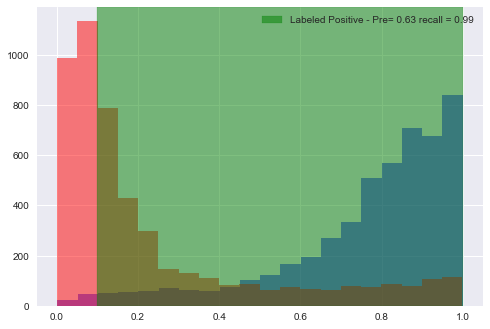

0.2


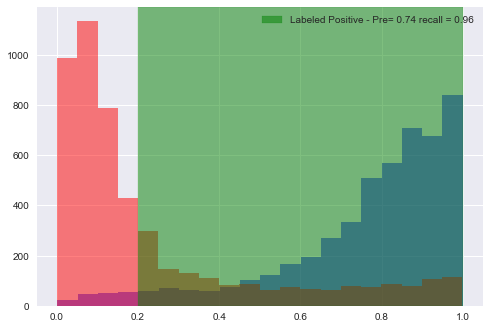

0.3


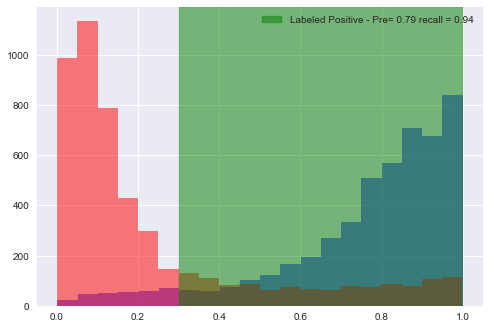

0.4


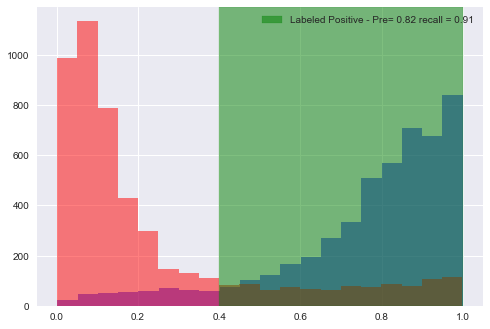

0.5


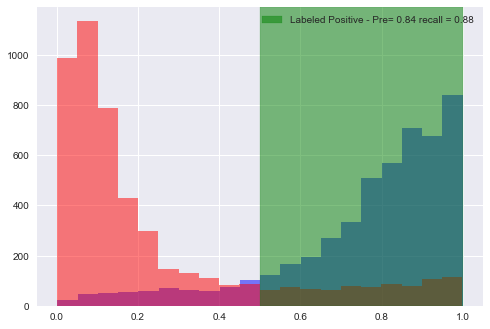

0.6


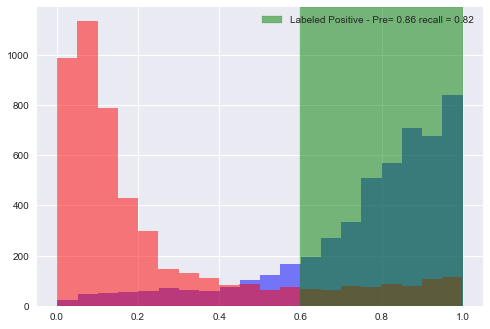

0.7


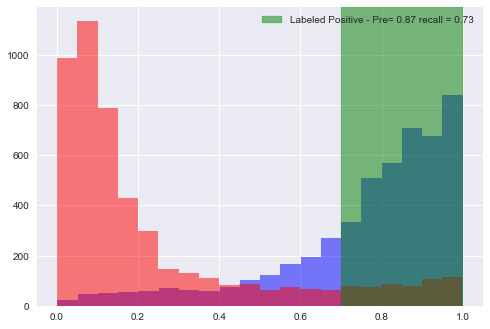

0.8


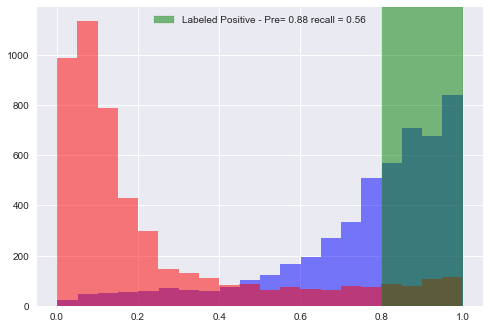

0.9


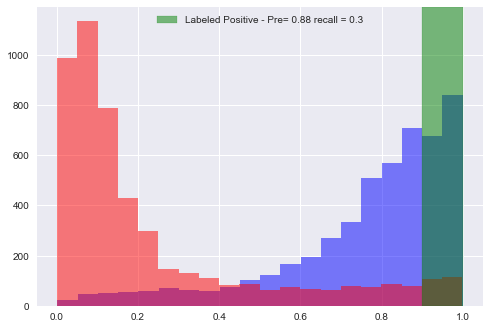

In [55]:
import seaborn
import matplotlib.pyplot as plt
precisions=[]
recalls=[]
for i in range(0,10):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    tp=len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])
    fp = len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])
    fn = len(df_X[(df_X['outcome']==1) & (df_X['score']<threshold)])
    precision = np.round(tp/(tp+fp),2)
    recall = np.round(tp/(tp+fn),2)
    precisions.append(precision)
    recalls.append(recall)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - Pre= ' + str(precision)+' recall = ' + str(recall))
    plt.legend()
    plt.savefig("../img/prec_recall_" + str(i) + ".png")
    plt.show()


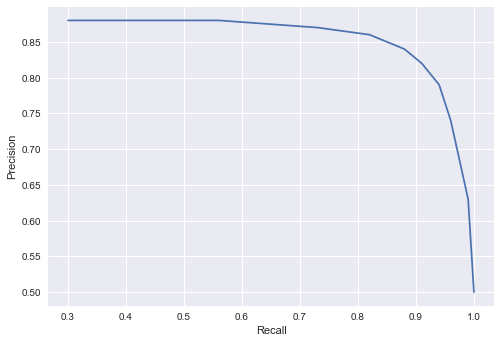

In [56]:

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recalls,precisions)

In [46]:
recalls

[1.0,
 0.9859943977591037,
 0.963985594237695,
 0.938375350140056,
 0.9141656662665066,
 0.8791516606642658,
 0.8217286914765907,
 0.728891556622649,
 0.5598239295718287,
 0.30392156862745096]

In [47]:
precisions

[0.4998,
 0.6309859154929578,
 0.7431744562702453,
 0.7937045185310543,
 0.8236884802595997,
 0.8446751249519415,
 0.8597446095876072,
 0.8702818920210225,
 0.8779416379039849,
 0.875]

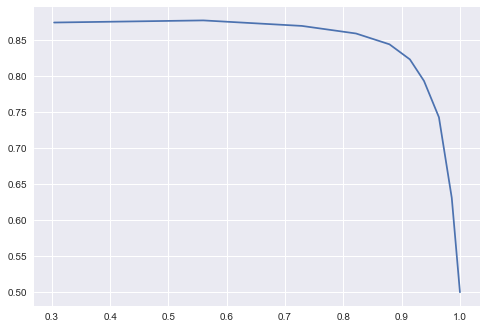

In [49]:
plt.plot(recalls,precisions)

In [5]:
x=np.linspace(0, 1, num=100)

In [6]:
y = [1.0/k for k in x]

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


First some definitions:
    
- Let $p = p(\textrm{purchase} | \textrm{ shared })$, the probability that someone purchases
one of your tickets given that it was shared to them.

- $p_s(n) = p_s$ be the probability that someone shares Robbie's link at the nth step.

- $M$ is the amoutn of friends the person has originally. Due to how imbred the music scene is, let's say that
at the $kth$ step, the amoutn of new friends someone can share with is $M/2^k$. Although it's probably far worse.

- Then we can computed the expected number of Robbie's points:

$$ \mathbb{E} (\textrm{points}) = pM + \frac{1}{2} \sum_{i=1}^N p \left(\frac{p_s}{2}\right)^n M. $$

The geometric distribution arising from:

$$p ( \textrm{ nth person purchase | you share }) = pp_s^{n-1}$$

We can then computed the expected number of comps that all of the desperate people in the music scene will be asking for repeatedly. After computing the sum and rearranging, we multiply by a third to get comps: 

$$ \mathbb{E} (\textrm{comps}) = \frac{Mp}{300} \frac{4-p_s}{2-p_s}.$$

So for instance, if the probability of purchasing is $p=1/10$ and $p_s = 1/10$ then we get

$$ \mathbb{E} (\textrm{comps}) \sim \frac{M}{500}.$$

**However we have not considered how fucking long Robbie's post is.**

Let's now plot a simulation of $$p( \textrm{ read robbie's long fucking message | # of words })$$


So basically it was all a waste of our time. 


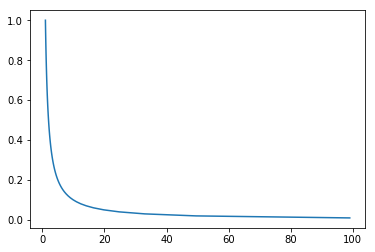

In [12]:
plt.plot(y,x)